<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/project/HeartDiseaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#심장병 Kaggle 데이터 분석

## 1. 문제정의

> 심장병은 미국에서 가장 높은 사망률을 보이는 질병이다. 

> 심장병의 발병에 영향을 끼치는 요인을 분석해 본다.

## 2. 데이터 수집

> 데이터셋은 Kaggle 대회에 업로드된 'Personal Key Indicators of Heart Disease' 데이터를 사용한다.
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=heart_2020_cleaned.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/content/drive/MyDrive/이어드림/toy_project/heart_2020_cleaned.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


> 데이터 분석의 편의성을 위해 Yes는 1로, No는 0 으로 변경하겠다.

In [21]:
df = df.replace('Yes',1).replace('No',0)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


## 3. 원본데이터 컬럼 분석 및 결측치 확인

> 범주형 데이터 (14개)

    - HartDisease : 심장병 여부 (Target Data) [Yes, No]
    - Smoking : 살면서 흡연을 100개피 이상했는지여부 [Yes,No]
    - AlcoholDrinking : 애주가 여부 [Yes, No]
    - Stroke : 뇌졸증 증세 [Yes, No]
    - DiffWalking : 걷는데 불편함이 있는지 [Yes, No]
    - Sex : 성별 [Female, Male]
    - AgeCategory : 나이 [18-24, 25-29, 30-34, 35-59, 40-44,45-49, 50-54, 55-59, 60-64, 65-59, 70-74, 75-79, 80 or older]
    - Race : 인종 ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
    - Diabetic : 당뇨병 [Yes, No]
    - PhysicalActivity : 지난 30일간 운동 혹은 신체적 활동을 하는 일을 하는지 [Yes, No]
    - GenHaelth : 자신이 건강한지 본인판단 ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']
    - Asthma : 천식[Yes,No]
    - KidneyDisease	: 신장병 [Yes, No]
    - SkinCancer : 피부암 [Yes, No]
> 수치형 데이터 (4개)

    - BMI : 체질량지수, 자신의 몸무게(kg)를 키의 제곱(m)으로 나눈 값
    - PhysicalHealth : 지난 30일동안 몸이 안좋았던 날의 수
    - MentalHealth : 지난 30일동안 정신건강이 안좋았던 날의 수
    - SleepTime : 하루에 평균 몇시간 자는지


>
    HeartDisease    Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
    BMI    Body Mass Index (BMI)
    Smoking    Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
    AlcoholDrinking    Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
    Stroke    (Ever told) (you had) a stroke?
    PhysicalHealth    Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
    MentalHealth    Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
    DiffWalking    Do you have serious difficulty walking or climbing stairs?
    Sex    Are you male or female?
    AgeCategory    Fourteen-level age category
    Race    Imputed race/ethnicity value
    Diabetic    (Ever told) (you had) diabetes?
    PhysicalActivity    Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
    GenHealth    Would you say that in general your health is...
    SleepTime    On average, how many hours of sleep do you get in a 24-hour period?
    Asthma    (Ever told) (you had) asthma?
    KidneyDisease    Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
    SkinCancer    (Ever told) (you had) skin cancer?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [40]:
dfli = list(df.columns)
dfli_nor =[ i for i in dfli if i not in ['BMI','PhysicalHealth', 'MentalHealth','SleepTime'] ]

In [41]:
# 명목현 데이터의 describe
df[dfli_nor].describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.068097,0.037740,0.138870,0.775362,0.134061,0.036833,0.093244
std,0.279766,0.492281,0.251912,0.190567,0.345812,0.417344,0.340718,0.188352,0.290775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


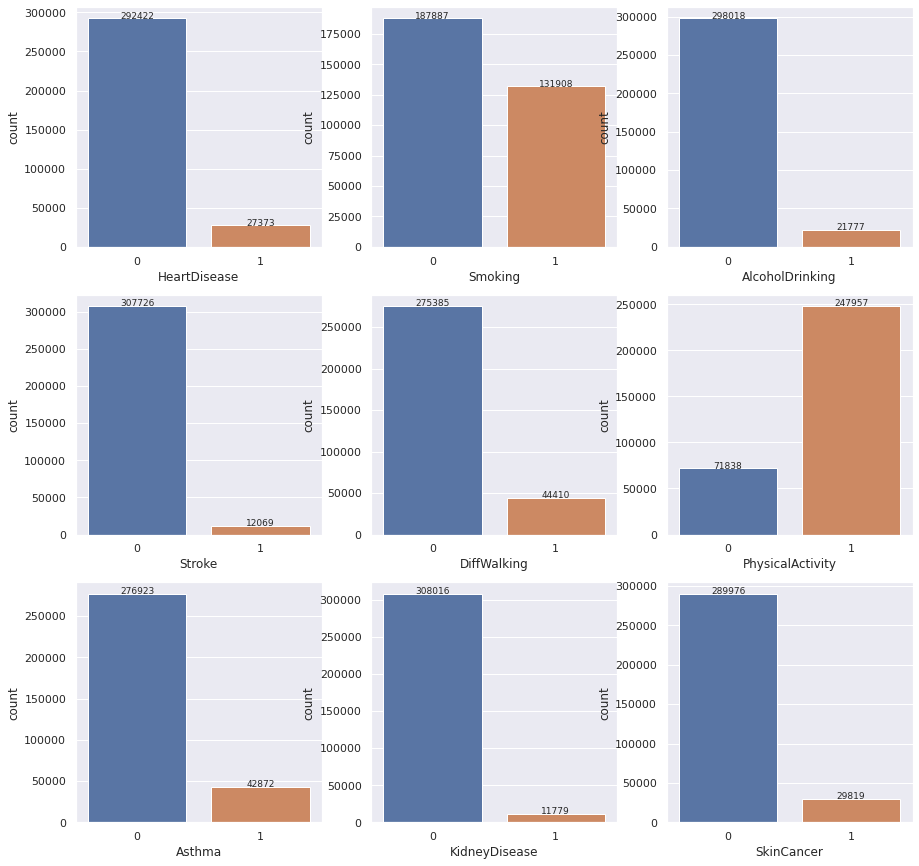

In [80]:
sns.set(rc={'figure.figsize':(12, 5)})
plt.figure(figsize=(15,15))
for i in range(len(df[dfli_nor].describe().columns)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x= df[df[dfli_nor].describe().columns[i]], data = df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.show()

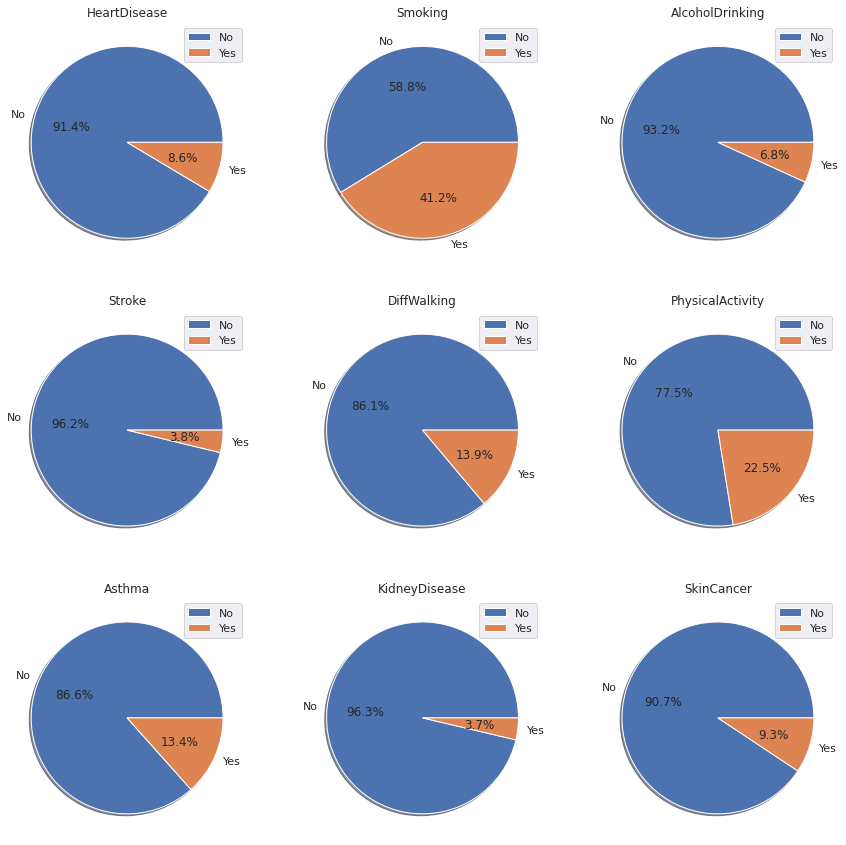

In [71]:
sns.set(rc={'figure.figsize':(12, 5)})
plt.figure(figsize=(15,15))
for i in range(len(df[dfli_nor].describe().columns)):
    plt.subplot(3,3,i+1)
    plt.title(df[dfli_nor].describe().columns[i])
    plt.pie(df[df[dfli_nor].describe().columns[i]].value_counts(), labels= ['No','Yes'], autopct = '%.1f%%',  shadow = True)
    plt.legend()

plt.show()

> 

    - Target HaertDisease 의 발병율이 0.085로 약 10%에 가까울정도로 높다.
    - Smoking 흡연률이 0.41 로 높다는 것을 볼수있다.
    - AlcoholDrinking 생각보다 애주가의 비율이 0.068로 작다
    - PhysicalActivity 신체활동 비율 수치가 생각보다 높다 0.775


In [25]:
# 수치형 데이터의 description
df[['BMI','PhysicalHealth', 'MentalHealth','SleepTime']].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


> 
    PhysicalHealth, MentalHealth 데이터를 보면 상위 50%까지 숫자가 0 인점을 발견할 수 있다.  
    즉 대부분의 데이터가 0에 쏠려 있다는 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

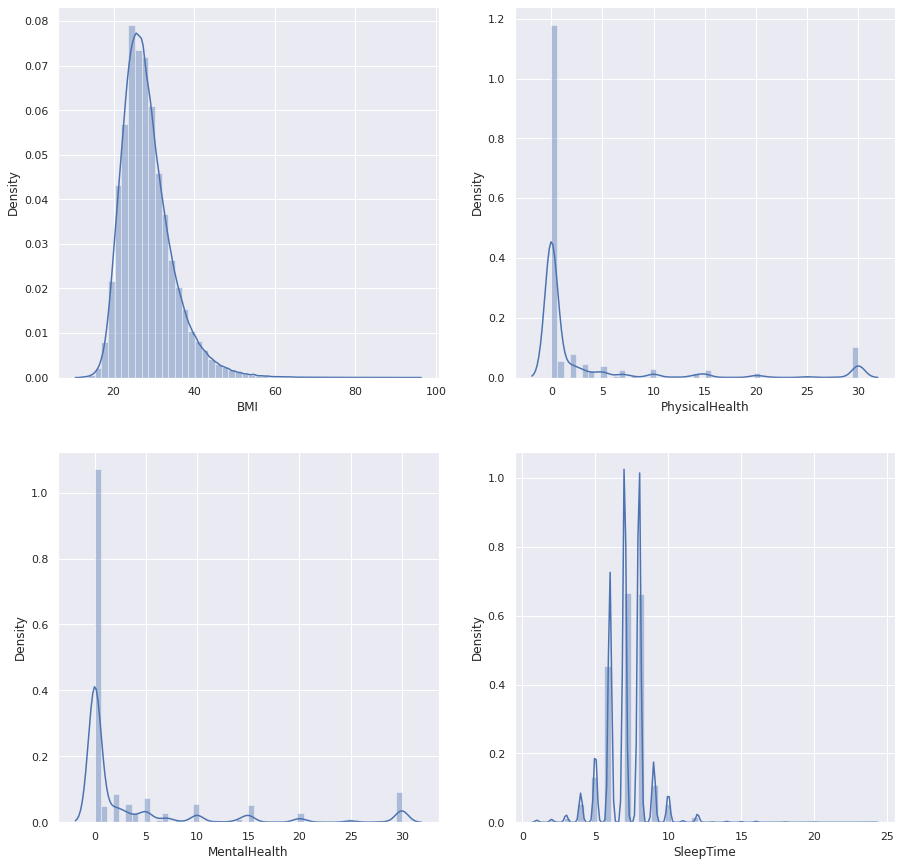

In [43]:
sns.set(rc={'figure.figsize':(12, 5)})
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(df['BMI'])
plt.subplot(2,2,2)
sns.distplot(df['PhysicalHealth'])
plt.subplot(2,2,3)
sns.distplot(df['MentalHealth'])
plt.subplot(2,2,4)
sns.distplot(df['SleepTime'])
plt.show()

In [11]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

> 확인결과 결측치는 없었다.

## 4. 컬럼별 영향관계 분석

### 4-1. 성별 발병률

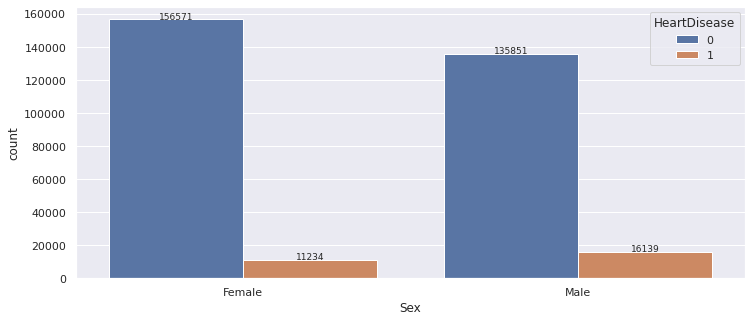

In [81]:
ax = sns.countplot(data=df, x='Sex',hue='HeartDisease')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

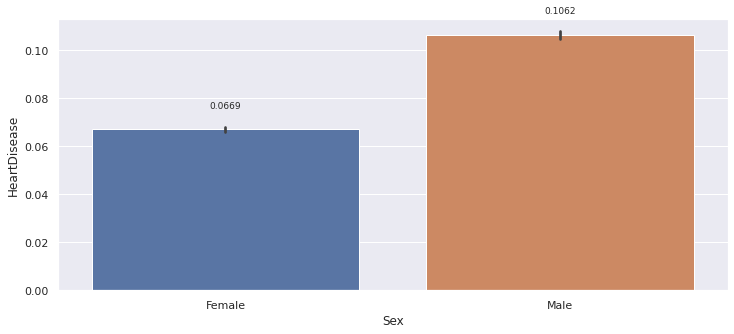

In [94]:
ax = sns.barplot(data=df, x='Sex',y='HeartDisease')
for p in ax.patches:
    height = round(p.get_height(),4)
    ax.text(p.get_x() + p.get_width() / 2.,y=height+0.009,s= height, ha = 'center', size = 9)
plt.show()


>

    남성의 심장병 발병확률이 더 높은 것을 볼 수 있었다.

### 4-2 인종별 발병률


In [77]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

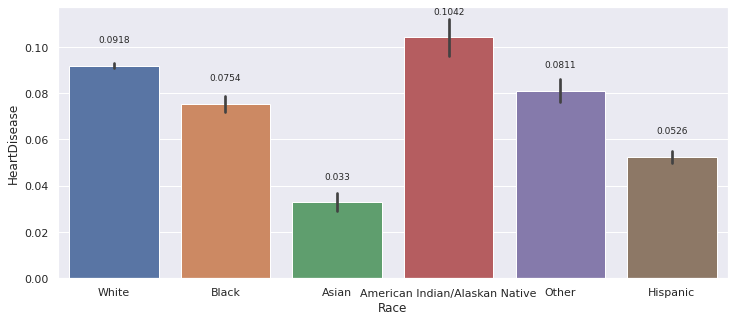

In [92]:
ax = sns.barplot(data=df, x='Race', y='HeartDisease')
for p in ax.patches:
    height = round(p.get_height(), 4)
    ax.text(p.get_x() + p.get_width() / 2.,y=height+0.01,s= height, ha = 'center', size = 9)
plt.show()

>
    Amrican Indian/Alaskan의 발병률이 가장 높았으며,
    Asian의 발병률이 가장 낮은 것을 확인 할 수 있다.